In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.dates as mdates

In [2]:
mlb_stats = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group055_WI24/master/MLBStats.csv?token=GHSAT0AAAAAACNDSILHSF4FRI7DTHDBSG2QZPOLTGQ')

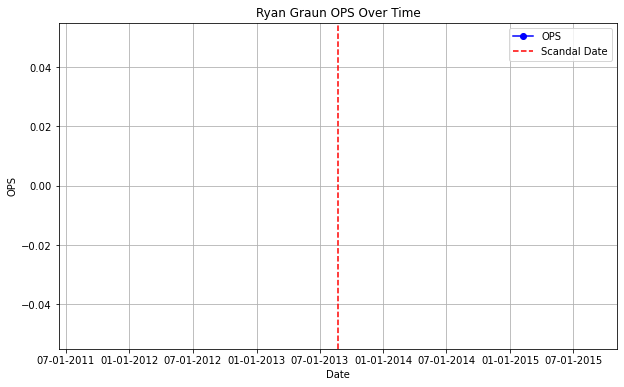

In [6]:
def plot_player_fantasy_points(player_name, mlb_stats, scandal_dates=None):
    # Filter data for the specified player
    player_data = mlb_stats[mlb_stats['Player'] == player_name]

    # Convert Date 
    player_data.loc[:, 'Date'] = pd.to_datetime(player_data.loc[:, 'Date'])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['Date'].values, player_data['OPS'].values, marker='o', linestyle='-', color='b', label='OPS')

    # Check if scandal dates are provided, and plot the vertical lines
    if scandal_dates:
        for scandal_date in scandal_dates:
            scandal_date = pd.to_datetime(scandal_date)
            plt.axvline(x=scandal_date, color='r', linestyle='--', label='Scandal Date')

    # Annotate data points with Fantasy Points values
    for index, row in player_data.iterrows():
        plt.annotate(str(row['OPS']),
                     (row['Date'], row['OPS']),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

    plt.title(f'{player_name} OPS Over Time')
    plt.xlabel('Date')
    plt.ylabel('OPS')

    # Format X-axis dates as MM-DD-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

    plt.legend()
    plt.grid(True)
    plt.show()

# Example
scandal_dates = ['8/23/13']
plot_player_fantasy_points('Ryan Graun', mlb_stats, scandal_dates=scandal_dates)

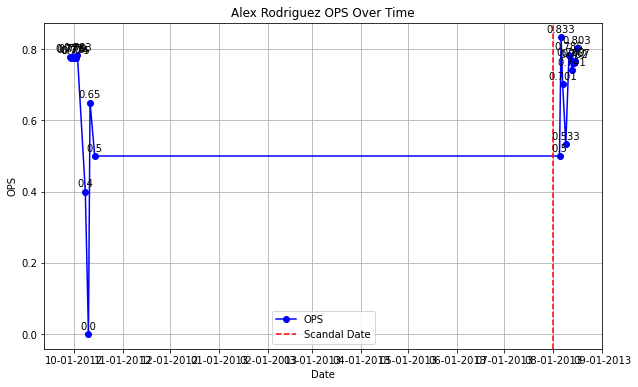

In [7]:
scandal_dates = ['8/1/13']
plot_player_fantasy_points('Alex Rodriguez', mlb_stats, scandal_dates=scandal_dates)

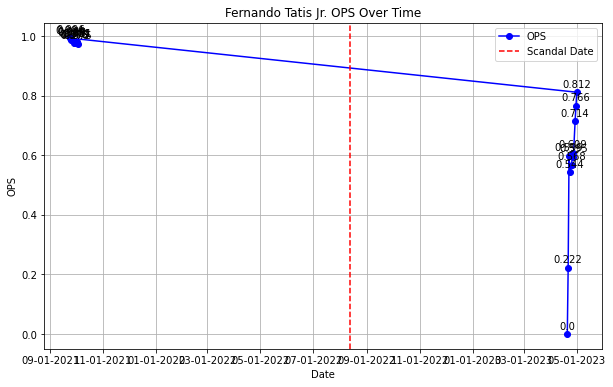

In [8]:
scandal_dates = ['8/12/22']
plot_player_fantasy_points('Fernando Tatis Jr.', mlb_stats, scandal_dates=scandal_dates)